<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/tf-handson-michelin-private/blob/master/L04_IntroCNN-SOLUCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Convolutional Deep Neural Networks (CNN) para clasificación multi-clase*

# 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

2024-06-11 17:29:35.939960: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-11 17:29:35.967113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 17:29:35.967142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 17:29:35.967864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-11 17:29:35.972309: I tensorflow/core/platform/cpu_feature_guar

### Información de versiones

In [2]:
print(tf.__version__)

2.15.0


### Comprobar si disponemos de una GPU

In [3]:
tf.config.list_physical_devices('GPU')

2024-06-11 17:29:41.649181: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 17:29:41.670610: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 17:29:41.671057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 1. Dataset

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,
                                                     train_size=55000,shuffle=True)

**¡AHORA TÚ!**
- Averigua las dimensiones de los datos de entrada proporcionados en el dataset

In [1]:
#TODO

In [5]:
#SOLUTION
print(X_train.shape)

(55000, 28, 28)


### Estandarización de las entradas

In [6]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

**¡AHORA TÚ!**
- Observa las dimensiones de `X_mean` y `X_std` con `.shape` y explica cómo se está haciendo la estandarización de los datos de entrada a la red.
- Observa que `X_mean` y `X_std` se calculan sobre el set de entrenamiento, pero después se aplican también para **pseudo estandarizar** el set de validación y el set de test, ¿puedes explicar por qué no se calculan `X_mean` y `X_std` sobre todas las imágenes disponibles y solamente sobre el set de entrenamiento?.

In [9]:
#TODO

In [7]:
#SOLUTION
print(X_train.shape)
print(X_mean.shape)
print(X_std.shape)

(55000, 28, 28)
(1, 28, 28)
(1, 28, 28)


In [8]:
# SOLUTION
# X_mean es una imagen de 28x28 px con el valor medio de cada píxel a lo largo de todo el set de entrenamiento
# X_std es una imagen de 28x28 px con la desviación estándar de cada a lo largo de todo el set de entrenamiento
# Cuando vayamos a hacer inferencia con el set de validación y de test, tenemos que aplicar la misma estandarización
# para que las entradas tengan una distribución próxima a la del entrenamiento.

### Ampliación de las dimensiones de entrada
- La red neuronal necesitará que los tensores `X` que representan la entrada tengan 4 dimensiones: <code>(num_imgs,height,width,num_channels)</code>
- Averigua las dimensiones de los datos de entrada proporcionados en el dataset y comprueba si necesitamos añadir la dimensión `nchannels` en base a lo anterior
- Comprueba como quedan las dimensiones de los arrays n-dimensionales de _numpy_ con las muestras (entrenamiento, validación y test) después de ejecutar la siguiente celda.

In [19]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [20]:
#SOLUTION
print(X_train.shape)

(55000, 28, 28, 1)


# 2. Entrenamiento

## Modelo 'base' de red neuronal

In [10]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=(28, 28, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(32, kernel_size=(3, 3), 
                 activation='relu',  padding='same'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

2024-06-11 17:33:35.622789: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 17:33:35.623628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 17:33:35.624546: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 17:33:35.744659: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 17:33:35.745624: I external/local_xla/xla/stream_executor

**¡AHORA TÚ!**
- En base a la anterior definición de red neuronal:
  - Busca información sobre `keras.layers.Conv2D()` y averigua qué quiere decir `padding='same'`. ¿Qué otra opción existe para este parámetro y qué implicaciones tiene usarla? 
  - ¿Cuántos _feature maps_ o `channels` se generan a la salida de la primera capa? ¿de qué tamaño son los `kernels` de convolución? 
  - ¿Eres capaz de intuir cuáles serán las dimensiones de los _feature maps_ después de realizar el primer _pooling_? 


**¡AHORA TÚ!**
- Obtén un `summary()` de la red anterior responde a las siguientes cuestiones:
   - Asegúrate de entender cómo disminuye el tamaño de las capas en `height` y `width` desde 28x28 px a la entrada hasta 7x7 después de la última capa de _pooling_.
   - ¿Cuántos parámetros entrenables tiene la red? Compara esta cifra con el número de parámetros de los modelos _fully connected_ de cuadernos anteriores. ¡Estamos creando una red con menos parámetros y esperamos que se comporte mejor!
   - ¿Eres capaz de explicar el número de parámetros entrenables de alguna de las capas?
   - Puedes probar a cambiar la configuración de `model1` y ver cómo afecta a los tamaños y número de capas.

In [11]:
#TODO

In [12]:
# SOLUTION
model1.summary()
#keras.utils.plot_model(model, show_shapes=True)
# - La opción padding='same' hace que la salida tenga las mismas dimensiones, debido a que se hace padding antes de hacer la
# convolución. La opción padding='valid' aplica la convolución solamente en la región válida, así que la salida se reducirá
# de acuerdo a las dimensiones del kernel de convolución.
# - En la primera capa hay 16 _feature_maps_ y los kernels de convolución tienen tamaño 3x3
# En la segunda capa...
# La red tiene 55,338 parámetros entrenables, frente a 266,610 que tenía el modelo base anterior


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 32)                5

**¡AHORA TÚ!**
- Entrena la red neuronal durante 15 epochs con un optimizador `adam`
- Ve observando durante el entrenamiento los resultados de `acc` y `val_acc` y compáralos con los obtenidos en cuadernos anteriores.

In [ ]:
#TODO

In [13]:
# SOLUTION
# En comparación con XX, donde teníamos más parámetros y entrenábamos durante 35 epochs 
# para accuracy de 92% y val_accuracy de 88%
# ... aquí en 15 epochs conseguimos accuracy de 97% y val_accuracy de 90%
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history1 = model1.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15


2024-06-11 17:36:52.626802: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-11 17:36:52.879869: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-11 17:36:53.168635: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-11 17:36:53.252116: I external/local_xla/xla/service/service.cc:168] XLA service 0x7df7060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-11 17:36:53.252175: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-06-11 17:36:53.257308: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718120213.338613  100996 device_

1719/1719 [==============================] - 15s 7ms/step - loss: 0.4506 - accuracy: 0.8417 - val_loss: 0.3543 - val_accuracy: 0.8650
Epoch 2/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3033 - accuracy: 0.8903 - val_loss: 0.2934 - val_accuracy: 0.8968
Epoch 3/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2581 - accuracy: 0.9064 - val_loss: 0.2789 - val_accuracy: 0.8994
Epoch 4/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2292 - accuracy: 0.9153 - val_loss: 0.2859 - val_accuracy: 0.8994
Epoch 5/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2086 - accuracy: 0.9237 - val_loss: 0.2643 - val_accuracy: 0.9112
Epoch 6/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1894 - accuracy: 0.9297 - val_loss: 0.2610 - val_accuracy: 0.9058
Epoch 7/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1756 - accuracy: 0.9351 - val_loss: 0.2722 - val_accuracy: 0.9

**¡AHORA TÚ!**
- Muestra una gráfica la evolución del entrenamiento
  - ¿Se produce _overfitting_ durante el entrenamiento? Si es así, ¿a partir de qué _epoch_ aproximadamente?

Saving figure L04_IntroCNNs_adam


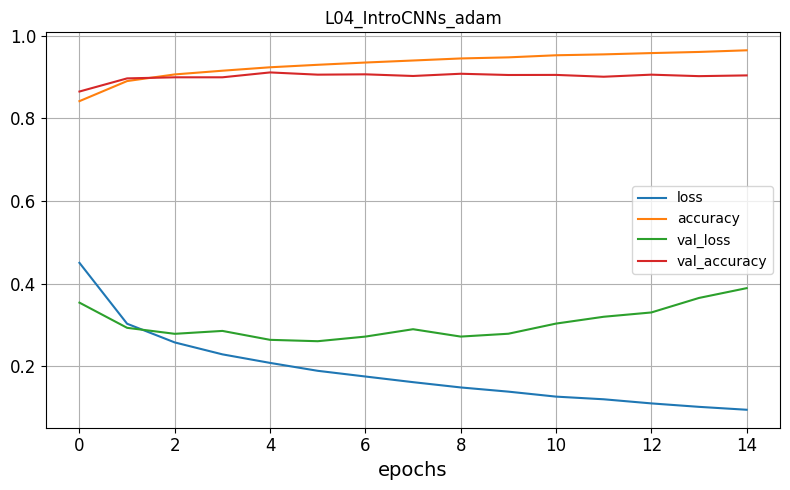

In [14]:
print_history(history1,"L04_IntroCNNs_adam")

## Batch Normalization 

Vamos a incorporar capas de `BatchNormalization()` a nuestro modelo, igual que en la práctica anterior.
- Llámalo esta vez `model2`
- Batch Normalization actúa como técnica de regularización. 
- Prueba a introducirlo entre las capas de convolución y _pooling_ y en la penúltima capa _fully connected_
- **No** debes incluir las activaciones en la capa anterior a `BatchNormalization()` **pero debes** incluir una capa de activación en la capa siguiente.
- ¿Cuántos parámetros entrenables y no entrenables se han añadido a la red?
- **No entrenes la red todavía**

In [2]:
#TODO

In [18]:
# SOLUTION
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,
                 input_shape=(28, 28, 1)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), 
                 padding='same',use_bias=False))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(32,use_bias=False))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        144       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 16)        64        
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4608      
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 32)       

## Early Stopping

- Parar el entrenamiento es una forma de prevenir que la red sobreentrene y también de no gastar tiempo de cómputo innecesariamente.
- Se puede dejar a la red que siga entrenando durante un tiempo, pero utilizar después en la etapa de inferencia los parámetros que proporcionaron el menor `val_loss` o la mejor `val_acc` (distintos de los de la última _epoch_).

In [19]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,verbose=1)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.keras", save_best_only=True)

**¡AHORA TÚ!**
- Vamos a entrenar la red `model2` durante 15 _epochs_ y a guardar los resultados del entrenamiento en una variable `history2`
- Para el entrenamiento, incluye los _callbacks_ `early_stopping_cb` y `model_checkpoint_cb` tal y como los hemos definido arriba. Para ejecutar varios _callback_ simultáneamente recuerda que puedes hacer una lista con corchetes en la llamada en la función `fit()`.
- Mientras se realiza el entrenamiento revisa información sobre `EarlyStopping()` y `ModelCheckpoint()`.
   - https://keras.io/api/callbacks/early_stopping/
   - https://keras.io/api/callbacks/model_checkpoint/


In [3]:
#TODO

In [20]:
# SOLUTION
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,model_checkpoint_cb])

Epoch 1/15
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4077 - accuracy: 0.8647 - val_loss: 0.3027 - val_accuracy: 0.8884
Epoch 2/15
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2660 - accuracy: 0.9046 - val_loss: 0.2769 - val_accuracy: 0.9016
Epoch 3/15
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2297 - accuracy: 0.9162 - val_loss: 0.2516 - val_accuracy: 0.9044
Epoch 4/15
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2049 - accuracy: 0.9255 - val_loss: 0.2603 - val_accuracy: 0.9074
Epoch 5/15
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1858 - accuracy: 0.9308 - val_loss: 0.2959 - val_accuracy: 0.8928
Epoch 6/15
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1708 - accuracy: 0.9368 - val_loss: 0.2564 - val_accuracy: 0.9150
Epoch 6: early stopping


**¡AHORA TÚ!**
- Finalizado el entrenamiento, representa un gráfico con la evolución de la red y a continuación, responde a las siguientes preguntas:
  - ¿En qué _epoch_ se ha parado el entrenamiento?
  - ¿En qué _epoch_ se obtenía el menor _val_loss_?
  - ¿Los parámetros de qué epoch se han salvado en 'model2.keras'?

In [4]:
#TODO

Saving figure L04_IntroCNNs_adam_early


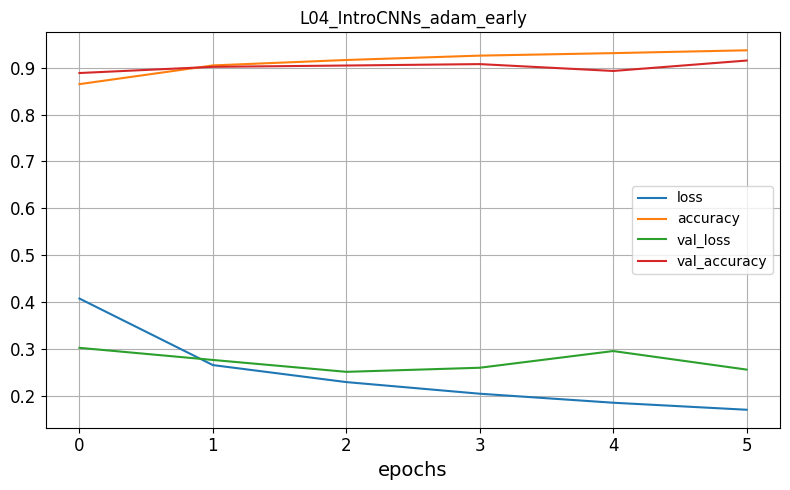

In [22]:
# SOLUTION
print_history(history2,"L04_IntroCNNs_adam_early")

## Variación dinámica del learning rate
- Una forma de prevenir el sobreentrenamiento es ir disminuyendo de manera dinámica el _learning rate_. De hecho, algunos optimizadores lo hacen internamente de manera automática.
- Entre las estrategias más utilizadas encontramos _Reduce on plateau_, que consiste en añadir un _callback_ para que se reduzca el `learning_rate` cuando el _loss_ se queda en una meseta. 

In [23]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.4, patience=2,verbose=1)

**¡AHORA TÚ!**
- Vamos a volver a entrenar modelo `model1` (sin _Batch Normalization_) o `model2`, pero esta vez variando el _learning rate_ dinámicamente. 
- Vuelve a definir el modelo y llámalo `model3`

In [24]:
#TODO

In [25]:
# SOLUTION

model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,
                 input_shape=(28, 28, 1)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), 
                padding='same',use_bias=False))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(32,use_bias=False))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        144       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 16)        64        
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4608      
                                                                 
 batch_normalization_7 (Bat  (None, 14, 14, 32)       

In [56]:
# SOLUTION #model1
#model3 = keras.models.Sequential()
#model3.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
#                 activation='relu', padding='same',
#                 input_shape=(28, 28, 1)))
#model3.add(keras.layers.MaxPooling2D((2, 2)))
#model3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), 
#                 activation='relu',  padding='same'))
#model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model3.add(keras.layers.Flatten())
#model3.add(keras.layers.Dense(32, activation='relu'))
#model3.add(keras.layers.Dense(10, activation='softmax'))

**¡AHORA TÚ!**
- Añade el _callback_ `lr_scheduler` durante el entrenamiento, junto con los callbacks anteriores: `early_stopping_cb` y `model_checkpoint_cb`.
- Para no sobreescribir `model2.h5` será mejor que vuelvas a definir `model_checkpoint_cb` e incluir esta vez `model3.keras`.
- Lanza un entrenamiento con al menos 20 epochs y empleando el siguiente optimizador
- Mientras se realiza revisa información sobre `EarlyStopping()`.
   - https://keras.io/api/callbacks/reduce_lr_on_plateau/
- Grafica los resultados y compara con entrenamientos anteriores

In [26]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [28]:
#TODO

In [29]:
#SOLUTION
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model3.keras", save_best_only=True)

In [30]:
# SOLUTION
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history3 = model3.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4100 - accuracy: 0.8608 - val_loss: 0.2900 - val_accuracy: 0.8948 - lr: 0.0010
Epoch 2/20
   1/1719 [..............................] - ETA: 12s - loss: 0.3388 - accuracy: 0.8750

/home/marmar/anaconda3/envs/curso-python-gpu/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 20s 12ms/step - loss: 0.2655 - accuracy: 0.9041 - val_loss: 0.2828 - val_accuracy: 0.8996 - lr: 0.0010
Epoch 3/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2289 - accuracy: 0.9165 - val_loss: 0.2690 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 4/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2038 - accuracy: 0.9246 - val_loss: 0.2525 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 5/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1871 - accuracy: 0.9306 - val_loss: 0.2509 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 6/20
1719/1719 [==============================] - 18s 11ms/step - loss: 0.1687 - accuracy: 0.9382 - val_loss: 0.2582 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 7/20
1717/1719 [============================>.] - ETA: 0s - loss: 0.1550 - accuracy: 0.9421
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
1719/1719 [==============================]

Saving figure L04_IntroCNNs_lrreduce


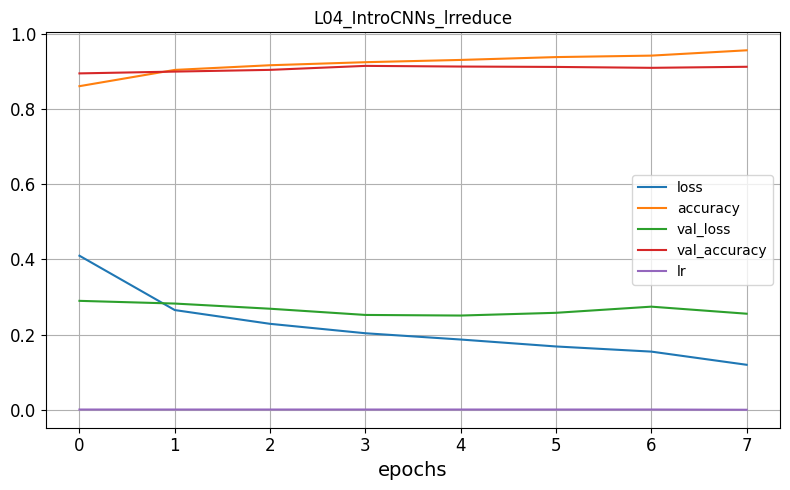

In [31]:
#SOLUCION
print_history(history3,"L04_IntroCNNs_lrreduce")

## Dropout
- Puedes introducir capas de Dropout de la siguiente manera.

`keras.layers.Dropout(rate=...)`

**¡AHORA TÚ!**
- Crea un nuevo modelo `model4` añadiendo capas de dropout  después de las capas de _pooling_ en `model2`. Puedes probar con valores de `rate=0.25` por ejemplo.
- Lanza un entrenamiento de al menos 20 _epochs_ y con _Early Stopping_ y que guarde los pesos en `model4.keras`. Utiliza un valor de `epochs` y `patience` acorde a las capacidades de procesamiento de tu ordenador. Si es lento no pongas valores elevados. El valor de `patience` en el callback que reduce el _learning_rate_ deberá ser mayor que en callback que hace el _model_checkpoint_.
- Durante el mismo busca información sobre las capas `Dropout` y el parámetro `rate`.
- Grafica nuevamente los resultados y compara el entrenamiento con los modelos anteriores
- Por último, si el entrenamiento no se hubiera parado en la última _epoch_, salva los resultados con `model4.save("model4.keras")`

In [34]:
#TODO

In [47]:
# SOLUTION
model4 = keras.models.Sequential()
model4.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,input_shape=(28, 28, 1)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation('relu'))
model4.add(keras.layers.MaxPooling2D((2, 2)))
model4.add(keras.layers.Dropout(0.25)),
model4.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same',use_bias=False))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation("relu"))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(keras.layers.Dropout(0.25)),
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(32,use_bias=False))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation("relu"))
model4.add(keras.layers.Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        144       
                                                                 
 batch_normalization_18 (Ba  (None, 28, 28, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)       

In [48]:
#SOLUTION
optimizer = keras.optimizers.Adam(learning_rate=0.001)


In [49]:
# SOLUTION
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [50]:
#SOLUTION
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,verbose=1)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model4.keras", save_best_only=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.4, patience=2,verbose=1)

In [51]:
history4 = model4.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/20


2024-06-11 18:14:58.237916: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1719/1719 [==============================] - 20s 11ms/step - loss: 0.5129 - accuracy: 0.8241 - val_loss: 0.3355 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3489 - accuracy: 0.8741 - val_loss: 0.2946 - val_accuracy: 0.8944 - lr: 0.0010
Epoch 3/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3201 - accuracy: 0.8833 - val_loss: 0.2858 - val_accuracy: 0.8942 - lr: 0.0010
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2990 - accuracy: 0.8917 - val_loss: 0.2643 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2835 - accuracy: 0.8968 - val_loss: 0.2626 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 6/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2735 - accuracy: 0.8989 - val_loss: 0.2534 - val_accuracy: 0.9046 - lr: 0.0010
Epoch 7/20
1719/1719 [==============================] - 14s 8m

Saving figure L04_IntroCNNs_dropout


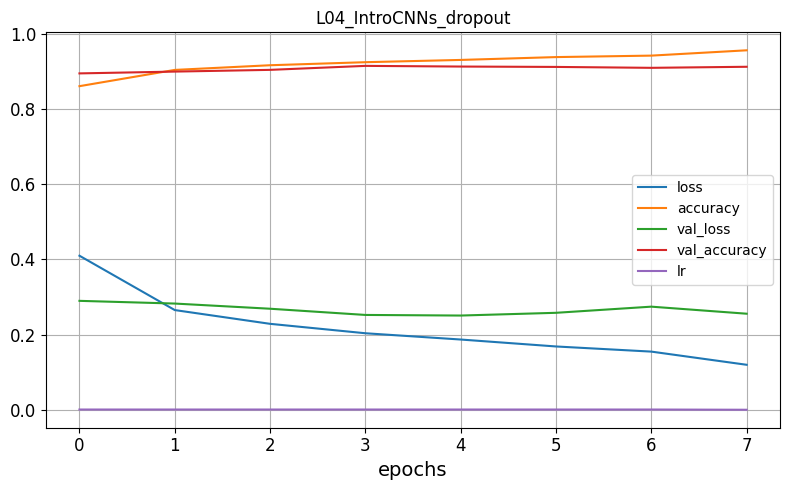

In [52]:
# SOLUTION
print_history(history3,"L04_IntroCNNs_dropout")

## 3. Test
**¡AHORA TÚ!**
- Carga alguno de los modelos salvados anteriormente y evalúalo (usando `evaluate()`), sobre las muestras reservadas para test. 
- A continuación:
  - Evalúa el modelo sobre el set de test empleando `evaluate()`
  - En otra celda genera predicciones con `predict()` sobre **todo el subconjunto de test**.

In [ ]:
#TODO

In [53]:
#model = keras.models.load_model("model1.keras")
#model = keras.models.load_model("model2.keras")
#model = keras.models.load_model("model3.keras")
model = keras.models.load_model("model4.keras")

In [54]:
# SOLUTION
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2219 - accuracy: 0.9173


In [56]:
# SOLUTION
y_pred = model.predict(X_test)
y_pred = np.argmax(model.predict(X_test),axis=-1)

313/313 [==============================] - 1s 3ms/step


### Matriz de confusión
**¡AHORA TÚ!**
- Utiliza las predicciones anteriores para generar un matriz de confusión normalizada y otra sin normalizar.
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [57]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [58]:
y_true = y_test

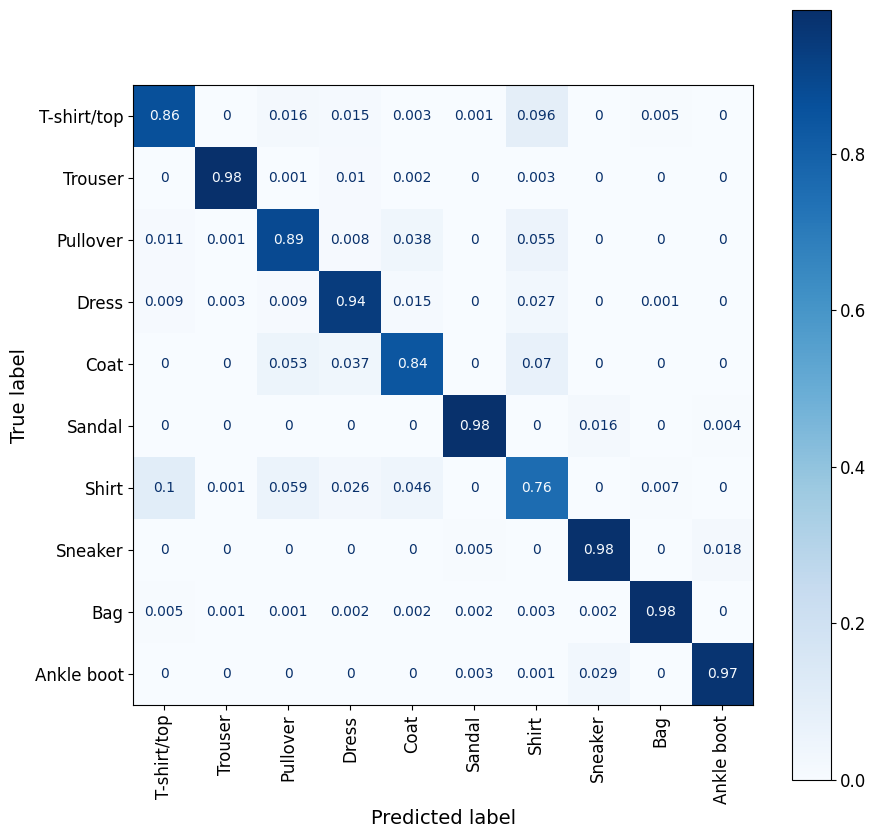

In [59]:
#SOLUTION
confnorm = confusion_matrix(y_true, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=confnorm,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

### Métricas de rendimiento
**¡AHORA TÚ!**
- Genera ahora una matriz de confusión sin normalizar.

In [5]:
#TODO

In [62]:
#SOLUTION
conf = confusion_matrix(y_true, y_pred)
print(conf)

[[864   0  16  15   3   1  96   0   5   0]
 [  0 984   1  10   2   0   3   0   0   0]
 [ 11   1 887   8  38   0  55   0   0   0]
 [  9   3   9 936  15   0  27   0   1   0]
 [  0   0  53  37 840   0  70   0   0   0]
 [  0   0   0   0   0 980   0  16   0   4]
 [105   1  59  26  46   0 756   0   7   0]
 [  0   0   0   0   0   5   0 977   0  18]
 [  5   1   1   2   2   2   3   2 982   0]
 [  0   0   0   0   0   3   1  29   0 967]]


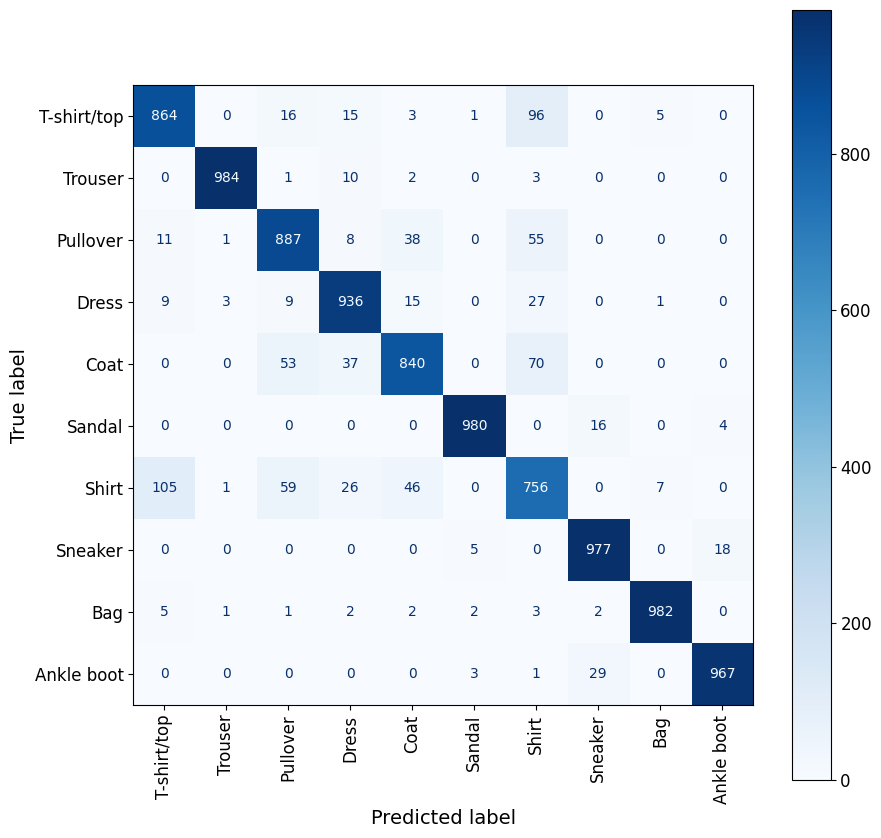

In [61]:
#SOLUTION
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- Observa cómo podemos obtener los TP,TN,FP y FN a partir de la matriz de confusión `conf`.
- Revisa el significado de estas variables y entiende cómo se han obtenido a partir de `conf`. ¿Por qué estas variables se expresan en forma de vectores en lugar de valores escalares?

In [63]:
TP = np.diag(conf)
FP = conf.sum(axis=0) - TP 
FN = conf.sum(axis=1) - TP
TN = conf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

**¡AHORA TÚ!**
- Calcula e imprime la métrica F1-score para cada clase y su valor medio.
- ¿Cuáles son las clases con las mejores/peores métricas F1-score?
- Prueba a calcular e imprimir también las métricas _Accuracy_, _Sensitivity_ y _Specificity_.

In [64]:
# SOLUTION
# F1 Score
FONE = 2*TP/(2*TP + FP + FN)

In [65]:
#SOLUTION
print("F1-score: ")
print(["{:0.2f}".format(x) for x in FONE])

F1-score: 
['0.87', '0.99', '0.88', '0.92', '0.86', '0.98', '0.75', '0.97', '0.98', '0.97']


In [66]:
#SOLUTION
print("Avg F1-score: {:0.2f}".format(np.mean(FONE)))

Avg F1-score: 0.92


In [67]:
#SOLUTION
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [68]:
#SOLUTION
print("Precision: ")
print(["{:0.2f}".format(x) for x in PPV])
print("Recall: ")
print(["{:0.2f}".format(x) for x in TPR])
print("Specificity: ")
print(["{:0.2f}".format(x) for x in TNR])
print("Accuracy: ")
print(["{:0.2f}".format(x) for x in ACC])


Precision: 
['0.87', '0.99', '0.86', '0.91', '0.89', '0.99', '0.75', '0.95', '0.99', '0.98']
Recall: 
['0.86', '0.98', '0.89', '0.94', '0.84', '0.98', '0.76', '0.98', '0.98', '0.97']
Specificity: 
['0.99', '1.00', '0.98', '0.99', '0.99', '1.00', '0.97', '0.99', '1.00', '1.00']
Accuracy: 
['0.97', '1.00', '0.97', '0.98', '0.97', '1.00', '0.95', '0.99', '1.00', '0.99']


# 4. Mejorando el modelo

### L1 and L2 Regularization
- Podemos incluir regularización L2 con factor 0.01 en las capas Dense o Conv2D de la siguiente manera:
```
keras.layers.Dense(100, activation= ...,                                  
                    kernel_regularizer=keras.regularizers.l2(0.01))
keras.layers.Conv2D(32, kernel_size=...,kernel_regularizer=keras.regularizers.l2(0.01),...)
 - `l2(0.01)` para L2 con factor 0.01
 - `l1(0.1)` para L1 con factor 0.1
 - `l1_l2(0.1, 0.01)` para L1 y L2 con factores 0.1 y 0.01 respectivamente
```
 
**¡AHORA TÚ!**
- Crea un nuevo modelo `model5` probando a introducir regularización en las distintas capas de `model3` y entrena durante al menos 25 épocas utilizando _Early Stopping_ y algún otro _callback_ de tu elección.

In [70]:
#SOLUTION
model5 = keras.models.Sequential()
model5.add(keras.layers.Conv2D(16, kernel_size=(3, 3),kernel_regularizer=keras.regularizers.l2(0.01),
                 padding='same',use_bias=False,
                 input_shape=(28, 28, 1)))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Activation("relu"))
model5.add(keras.layers.MaxPooling2D((2, 2)))
model5.add(keras.layers.Conv2D(32, kernel_size=(3, 3), kernel_regularizer=keras.regularizers.l2(0.01),
                padding='same',use_bias=False))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Activation("relu"))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(32,use_bias=False))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Activation("relu"))
model5.add(keras.layers.Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 16)        144       
                                                                 
 batch_normalization_24 (Ba  (None, 28, 28, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        4608      
                                                                 
 batch_normalization_25 (Ba  (None, 14, 14, 32)       

In [72]:
# SOLUTION
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer='RMSProp',
              metrics=["accuracy"])
history5 = model5.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4837 - accuracy: 0.8645 - val_loss: 0.3434 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 2/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3228 - accuracy: 0.8972 - val_loss: 0.3635 - val_accuracy: 0.8862 - lr: 0.0010
Epoch 3/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2969 - accuracy: 0.9057 - val_loss: 0.3158 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2771 - accuracy: 0.9115 - val_loss: 0.3146 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2692 - accuracy: 0.9145 - val_loss: 0.3167 - val_accuracy: 0.9080 - lr: 0.0010
Epoch 6/20
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2609 - accuracy: 0.9173 - val_loss: 0.3079 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 7/20
1719/1719 [==============================

Saving figure L04_IntroCNNs_l1l2


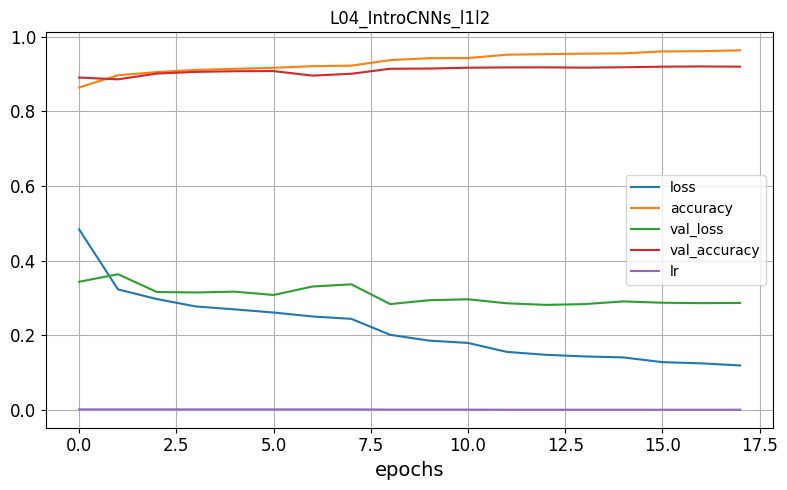

In [73]:
# SOLUTION
print_history(history5,"L04_IntroCNNs_l1l2")

### (Opcional) Aumentando la profundidad de la red

**¡AHORA TÚ!**
- Para hacer este apartado se requiere utilizar la nube de cómputo o un ordenador potente configurados con GPUs
- Lo que tenemos hasta ahora no es una red suficientemente _"deep"_. Crea un modelo `model6` aumentando el número de capas convolucionales de la red `model4` y la profundidad de la red (número de filtros de convolución).   
  - Deberías aumentar el número de channels en las capas más profundas de la red, ¿sabes contestar por qué?.
   - Observa que también puedes aumentar el número de neuronas en la capa _hidden_ de perceptrón multicapa (MLP) que hay al final de la red.
   - Controla el número de parámetros entrenables y número de capas en un tamaño manejable para el equipo que estás utilizando.
   - No utilices regularización L2 en este experimento si tu ordenador es demasiado lento.
   - Recuerda que puedes añadir _callbacks_ para variar el _learning rate_ dinámicamente.
   - Lanza el entrenamiento para un número de _epochs_ elevado (por ejemplo 50) y recuerda que puedes utilizar _early stopping_ ajustando el parámetro _patience_.
- A ver si puedes obtener un resultado cercano a `val_accuracy` en torno a 93%... ¡o mejor aún!

In [74]:
# SOLUTION
model6 = keras.models.Sequential()
model6.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,input_shape=(28, 28, 1)))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.MaxPooling2D((2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same',use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Conv2D(64, kernel_size=(3, 3),padding='same',use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Conv2D(128, kernel_size=(3, 3),padding='same',use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(128,use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.Dense(10, activation='softmax'))
model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        144       
                                                                 
 batch_normalization_27 (Ba  (None, 28, 28, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)      

In [75]:
# SOLUTION
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history6 = model6.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/50


2024-06-11 18:34:13.218615: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1719/1719 [==============================] - 21s 10ms/step - loss: 0.6627 - accuracy: 0.7568 - val_loss: 0.4060 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 2/50
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4536 - accuracy: 0.8348 - val_loss: 0.3344 - val_accuracy: 0.8784 - lr: 0.0010
Epoch 3/50
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4026 - accuracy: 0.8517 - val_loss: 0.3053 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 4/50
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3704 - accuracy: 0.8639 - val_loss: 0.2908 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 5/50
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3558 - accuracy: 0.8687 - val_loss: 0.2764 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 6/50
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3401 - accuracy: 0.8754 - val_loss: 0.2701 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/50
1719/1719 [==============================] - 1

Saving figure L04_IntroCNNs_deep


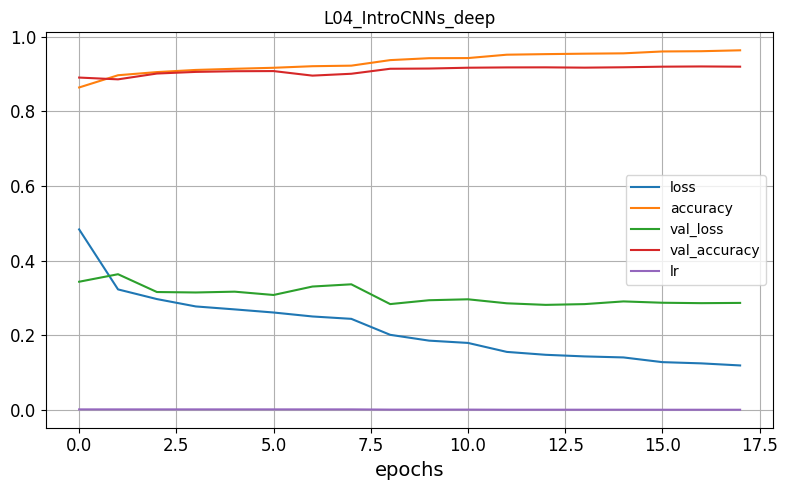

In [76]:
# SOLUTION
print_history(history5,"L04_IntroCNNs_deep")

## Ampliación

- Blog towardsdatascience: The 4 Convolutional Neural Network Models That Can Classify Your Fashion Images

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d
- Fashion MNIST benchmark

https://paperswithcode.com/sota/image-classification-on-fashion-mnist